---
title: "Tensorflow 2.0 Tutorial ch5.2 - 다항분류"
date: 2020-04-19T14:08:30+09:00
tags:
  - "Deep Learning"
  - "Python"
  - "Google Colab"
  - "Tensorflow 2.0"
  - "분류"
  - "이항분류"
  - "Binary Classification"
  - "Classification"
  - "텐서플로 2.0"
  - "텐서플로 2.0 튜토리얼"
  - "Tensorflow 2.0 Tutorial"
categories:
  - "Deep Learning"
  - "딥러닝"
  - "텐서플로 2.0"
  - "Python"
  - "Tensorflow 2.0"
  - "텐서플로 2.0 튜토리얼"
  - "Tensorflow 2.0 Tutorial"
menu: 
  python:
    name: Tensorflow 2.0 Tutorial ch5.2 - 다항분류
---

## 공지

- 본 Tutorial은 교재 `시작하세요 텐서플로 2.0 프로그래밍`의 강사에게 국비교육 강의를 듣는 사람들에게 자료 제공을 목적으로 제작하였습니다. 

- 강사의 주관적인 판단으로 압축해서 자료를 정리하였기 때문에, 자세하게 공부를 하고 싶은 반드시 교재를 구매하실 것을 권해드립니다. 

![](/img/tensorflow2.0/book.jpg)<!-- -->


- 본 교재 외에 강사가 추가한 내용에 대한 Reference를 확인하셔서, 추가적으로 학습하시는 것을 권유드립니다. 


## Tutorial

이전 강의가 궁금하신 분들은 아래에서 선택하여 추가 학습 하시기를 바랍니다. 

- [Google Colab Tensorflow 2.0 Installation](https://chloevan.github.io/python/tensorflow2.0/googlecolab/)
- [Tensorflow 2.0 Tutorial ch3.3.1 - 난수 생성 및 시그모이드 함수](https://chloevan.github.io/python/tensorflow2.0/ch3_3_1_random_signoid/)
- [Tensorflow 2.0 Tutorial ch3.3.2 - 난수 생성 및 시그모이드 함수 편향성](https://chloevan.github.io/python/tensorflow2.0/ch3_3_2_random_signoid_bias/)
- [Tensorflow 2.0 Tutorial ch3.3.3 - 첫번째 신경망 네트워크 - AND](https://chloevan.github.io/python/tensorflow2.0/ch3_3_3_network_and/)
- [Tensorflow 2.0 Tutorial ch3.3.4 - 두번째 신경망 네트워크 - OR](https://chloevan.github.io/python/tensorflow2.0/ch3_3_4_network_or/)
- [Tensorflow 2.0 Tutorial ch3.3.5 - 세번째 신경망 네트워크 - XOR](https://chloevan.github.io/python/tensorflow2.0/ch3_3_5_network_xor/)
- [Tensorflow 2.0 Tutorial ch4.1 - 선형회귀](https://chloevan.github.io/python/tensorflow2.0/ch4_1_linear_regression/)
- [Tensorflow 2.0 Tutorial ch4.2 - 다항회귀](https://chloevan.github.io/python/tensorflow2.0/ch4_2_multiple_linear_regression/)
- [Tensorflow 2.0 Tutorial ch4.3 - 딥러닝 네트워크를 이용한 회귀](https://chloevan.github.io/python/tensorflow2.0/ch4_3_regression_with_deeplearning/)
- [Tensorflow 2.0 Tutorial ch4.4 - 보스턴 주택 가격 데이터세트](https://chloevan.github.io/python/tensorflow2.0/ch4_4_boston_housing_deeplearning/)
- [Tensorflow 2.0 Tutorial ch5.1 - 분류](https://chloevan.github.io/python/tensorflow2.0/ch5_1_binary_classification/)


## I. 다항분류
지난 시간에 이항 분류에 대해 배웠다면 이번 시간에는 다항 분류에 대해서 배우는 시간을 갖도록 합니다. 다항 분류는 범주의 수가 2개를 초과하는 경우를 말합니다. 와인 데이터의 품질은 0에서 10까지의 숫자로 구분이 되어 있기 때문에, 품질을 종속변수로 생각하고 분류 할 수 있습니다. 

와인의 색깔이 아닌 와인의 품질에 대해 예측해보도록 합니다. 

## II. 데이터 준비

지난 시간에 배운 내용을 복습하면서 다시한번 소스코드를 작성합니다. 


In [1]:
# 텐서플로 2 버전 선택
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

import pandas as pd
import tensorflow as tf
from tabulate import tabulate

red = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
white = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')

red['type'] = 0
white['type'] = 1
wine = pd.concat([red, white])
print(wine.describe())

       fixed acidity  volatile acidity  ...      quality         type
count    6497.000000       6497.000000  ...  6497.000000  6497.000000
mean        7.215307          0.339666  ...     5.818378     0.753886
std         1.296434          0.164636  ...     0.873255     0.430779
min         3.800000          0.080000  ...     3.000000     0.000000
25%         6.400000          0.230000  ...     5.000000     1.000000
50%         7.000000          0.290000  ...     6.000000     1.000000
75%         7.700000          0.400000  ...     6.000000     1.000000
max        15.900000          1.580000  ...     9.000000     1.000000

[8 rows x 13 columns]


데이터셋이 준비가 되었다면, 품질 데이터가 어떤 비율로 구성이 되어 있는지 알아보도록 합니다. 

## III. 종속변수 선정 및 재범주화

In [2]:
print(wine['quality'].describe())

count    6497.000000
mean        5.818378
std         0.873255
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64


위 데이터 통계를 통해서 보면, 최소값은 3이고, 최대값은 9인 것으로 확인할 수 있습니다. `value_counts()`에서는 각 분류의 개수를 확인해보면 각 항목의 수가 균일하지 않고 꽤 차이가 나는 것을 볼 수 있습니다. 좀 더 정확한 정보를 알기 위해 히스토그램 시각화를 진행합니다. 

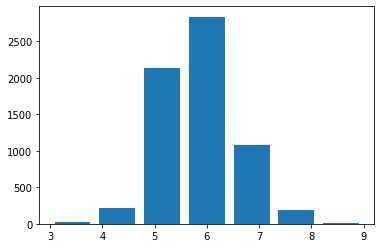

In [3]:
import matplotlib.pyplot as plt
plt.hist(wine['quality'], bins=7, rwidth=0.8)
plt.show()


데이터의 양이 작은 대신 범주의 수가 많은 것을 확인할 수 있습니다. 실제 값의 개수를 확인해도 마찬가지입니다.[^1]

[^1]: 강사가 직접 작성한 코드입니다.

In [4]:
count = wine['quality'].value_counts()
ratio = wine['quality'].value_counts(normalize=True)

frame = { 'Count': count, 'Ratio': ratio } 

print(tabulate(frame, headers='keys', tablefmt='psql'))

+---------+-------------+
|   Count |       Ratio |
|---------+-------------|
|    2836 | 0.436509    |
|    2138 | 0.329075    |
|    1079 | 0.166077    |
|     216 | 0.0332461   |
|     193 | 0.029706    |
|      30 | 0.00461752  |
|       5 | 0.000769586 |
+---------+-------------+


이 때 어떻게 재범주화 할 것인지가 중요한 요소가 됩니다. 여기서가 분석가와 현업사이에서의 커뮤니케이션이 발생하는 주요 지점이 됩니다. 이 부분에서 도메인 지식이 수반되는 지점이니 꼭 현업과 상의하면서 재범주화를 진행합니다. 

In [5]:
wine.loc[wine['quality'] <= 5, "new_quality"] = 0
wine.loc[wine['quality'] == 6, "new_quality"] = 1
wine.loc[wine['quality'] >=7, "new_quality"] = 2

count = wine['new_quality'].value_counts()
ratio = wine['new_quality'].value_counts(normalize=True)

frame = { 'Count': count, 'Ratio': ratio } 
print(tabulate(frame, headers='keys', tablefmt='psql'))

+---------+----------+
|   Count |    Ratio |
|---------+----------|
|    2836 | 0.436509 |
|    2384 | 0.366939 |
|    1277 | 0.196552 |
+---------+----------+


위 소스코드에서 `.loc`는 특정한 데이터의 인덱스를 골라내는 역할을 합니다. 본 교재(p. 125~126)에서는 간단한 예제로 설명이 되어 있습니다만, 이 부분은 강사가 향후 준비하는 자료로 대체하도록 합니다. `.loc외에` `.iloc`등 기본 문법 등이 같이 소개가 되면 더 좋을 듯 합니다. 

정리가 되는대로 자료 링크를 걸어두도록 합니다. 

## IV. 데이터 정규화 및 데이터 분리

코드부터 작성한 뒤, 설명을 진행하도록 합니다. 

In [6]:
del wine['quality']
wine_norm = (wine - wine.min()) / (wine.max() - wine.min())
wine_shuffle = wine_norm.sample(frac=1)
wine_np = wine_shuffle.to_numpy()

우선 `new_quality` 변수가 만들어졌기 때문에 기존의 `quality` 변수를 삭제하였습니다. 

`min()`, `max()` 함수를 통해서 데이터 정규화를 진행합니다. 

판다스의 `sample()` 함수는 전체 데이터프레임에서 `frac`인수로 지정된 비율만큼의 행을 랜덤하게 뽑아서 새로운 데이터프레임을 만듭니다. 
`frac=1`로 지정됐기 때문에 `100%`, 즉 모든 데이터를 뽑아서 섞는 것과 동일한 효과를 가집니다. 

*Tip: 입문자들이 처음 딥러닝 소스코드 작성하는 것을 어려워 하는 부분이 엑셀데이터와 같은 데이터프레임을 딥러닝의 Input 객체로 변환하는가인데, 위 소스코드는 굉장히 유용하며, 만약 반복적인 작업이 이루어지면 사용자 정의 함수를 사용하여 작성하여 사용하는 것도 도움이 된다. 

In [8]:
train_idx = int(len(wine_np) * 0.8)
train_X, train_Y = wine_np[:train_idx, :-1], wine_np[:train_idx, -1]
test_X, test_Y = wine_np[train_idx:, :-1], wine_np[train_idx:, -1]

train_Y = tf.keras.utils.to_categorical(train_Y, num_classes=3)
test_Y = tf.keras.utils.to_categorical(test_Y, num_classes=3)

그리고, 훈련 데이터와 테스트 데이터를 분리한 뒤 모형 학습을 진행하도록 합니다. 

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=48, activation="relu", input_shape=(12, )), 
    tf.keras.layers.Dense(units=24, activation="relu"), 
    tf.keras.layers.Dense(units=12, activation="relu"), 
    tf.keras.layers.Dense(units=3, activation="softmax")
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss='categorical_crossentropy', metrics=['accuracy'])
history=model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25)

Epoch 1/25
122/122 [==============================] - 0s 3ms/step - loss: 0.4841 - accuracy: 0.7901 - val_loss: 0.4100 - val_accuracy: 0.8069
Epoch 2/25
122/122 [==============================] - 0s 2ms/step - loss: 0.4264 - accuracy: 0.7983 - val_loss: 0.3942 - val_accuracy: 0.8123
Epoch 3/25
122/122 [==============================] - 0s 2ms/step - loss: 0.4163 - accuracy: 0.7991 - val_loss: 0.4250 - val_accuracy: 0.8069
Epoch 4/25
122/122 [==============================] - 0s 2ms/step - loss: 0.4260 - accuracy: 0.7970 - val_loss: 0.3923 - val_accuracy: 0.8069
Epoch 5/25
122/122 [==============================] - 0s 2ms/step - loss: 0.4220 - accuracy: 0.7996 - val_loss: 0.3869 - val_accuracy: 0.8185
Epoch 6/25
122/122 [==============================] - 0s 2ms/step - loss: 0.4166 - accuracy: 0.7993 - val_loss: 0.4265 - val_accuracy: 0.8108
Epoch 7/25
122/122 [==============================] - 0s 2ms/step - loss: 0.4221 - accuracy: 0.8001 - val_loss: 0.3898 - val_accuracy: 0.8069
Epoch 

모델 정의에서 마지막 레이어의 뉴런 수가 `2`가 아닌 `3`이 된 것 외에는 동일한 구조의 네트워크를 사용하였습니다. 검증 데이터에 대해 약 `79%` 정도의 분류 성적을 거두고 있습니다. 

늘 강조하듯이, 모형을 학습한 뒤에는 항상 모형 결과를 시각화해야 합니다. 그래야, 학습이 잘 되고 있는지, 아니면 `오버피팅(Overfitting)` 되고 있는지 확인해야 합니다. 

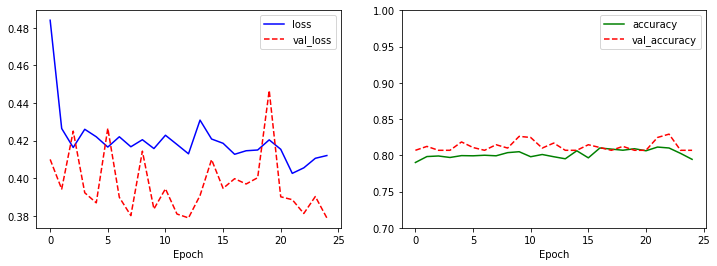

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'r--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

`val_loss`가 중간에 튀기도 하고, 전반적으로 `loss`보다 큰 값인 것을 확인할 수 있습니다. 학습을 계속하면 `loss`는 꾸준히 작아지지만 네트워크가 훈련 데이터에 과적합되기 때문에 `val_loss`는 증가하기 시작합니다. 

In [11]:
model.evaluate(test_X, test_Y)

41/41 [==============================] - 0s 982us/step - loss: 0.3943 - accuracy: 0.8092


[0.3943238854408264, 0.8092307448387146]

데스트 데이터의 정확도는 약 79.8% 정도로 검증 데이터의 정확도와 크게 차이가 없는 것으로 나온다. 이런 경우 해결방법은 네트워크의 구성도의 크기를 키우거나 학습률을 조정해보는 등 다양한 방면으로 노력해야 한다. 

## V. 결론

지금까지는 주로 데이터프레임에 기반하여 연습을 진행하였다. 딥러닝을 하는 목적은 사실 이러한 데이터프레임보다는 이미지 분류, 텍스트 분류와 같은 비정형 데이터 분류를 위한 것에 더 많이 사용된다. 이제 앞으로는 이러한 비정형 데이터를 다루는 방법, 학습하는 방법에 대해 공부가 될 예정이다. 

## VI. 연습 파일
- [구글 Colab에서 직접 연습해보자](https://colab.research.google.com/github/chloevan/deeplearningAI/blob/master/tensorflow2.0/ch5_2_multi_classification.ipynb) 

## VII. Reference

김환희. (2020). 시작하세요! 텐서플로 2.0 프로그래밍: 기초 이론부터 실전 예제까지 한번에 끝내는 머신러닝, 딥러닝 핵심 가이드. 서울: 위키북스.